In [1]:
import numpy as np
from keras.models import load_model 
from datasource import ImageGenerator, augmented_data
from keras.preprocessing.image import ImageDataGenerator
from train import image_label_paths
import imageio as iio 
import matplotlib.pyplot as plt 
from pdb import set_trace

INDIR = 'MRI_png_processed'
OUTDIR = 'MRI_predicted'
TITLES = ['Predicted', 'Truth']
TISSUE_VAL = { }

Using TensorFlow backend.

Bad key "text.kerning_factor" on line 4 in
/usr/local/anaconda3/envs/knees/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Data augmentation (randomly transformed copy of input samples)

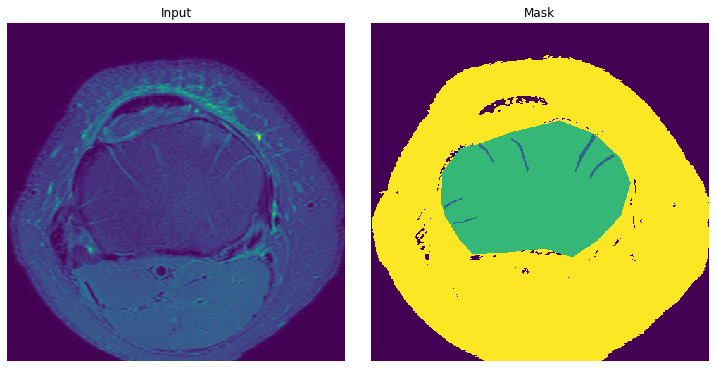

In [7]:
n_batches = 1
batch_size = 1
expansion_factor = 1

ipaths, lpaths = image_label_paths(INDIR)
ipaths = ipaths[:n_batches * batch_size]; lpaths = lpaths[:n_batches * batch_size]
generate = ImageGenerator(ipaths, lpaths, batch_size)

for (images, labels) in augmented_data(generate, expansion_factor):   
    for img, lbl in zip(images, labels):
        flt_lbl = lbl.argmax(-1) # flatten down the one-hot label map into integer labels 
        fig, axes = plt.subplots(1, 2, constrained_layout=True)
        fig.set_size_inches(10,5)
        for ax, data, ttl in zip(axes, [img,flt_lbl], ['Input', 'Mask']):
            ax.imshow(np.squeeze(data))
            ax.set_title(ttl)
            ax.set_axis_off()

## Model predictions 

In [6]:
unet = load_model('unet.h5')
batch_size = 2

ipaths, lpaths = image_label_paths(INDIR)
generate = ImageGenerator(ipaths, lpaths, batch_size)

for images, labels in iter(generate):
    predictions = unet.predict(images)
    fig, axes = plt.subplots(1, 3, constrained_layout=True)
    fig.set_size_inches(10,5)

    for ax, data, ttl in zip(axes, [img,pred,flt_lbl], ['blah'] + TITLES):
        ax.imshow(np.squeeze(data))
        ax.set_title(ttl)
        ax.set_axis_off()


ValueError: Error when checking input: expected image_slice to have shape (560, 560, 1) but got array with shape (480, 480, 1)

for (images, labels) in augmented_data(generate, expansion_factor):   
    predictions = np.zeros(images.shape)
    for img, pred, lbl in zip(images, predictions, labels):
#         print("expansion")
        flt_lbl = lbl.argmax(-1)
#         print(img.min(), img.max())
  